## Excercise showing MLP Neural Networks 
### Problem with multiple input variables. 



###  Practicum #1 - Maggie Sleziak

<B> 
<BR>Daily Summary from the Station at the Denver International Airport. 
<BR>Data-range: January 1, 2010 to August 26, 2018. 
<BR>These are daily measurements of precipitation in inches, average wind speed in miles, 
<BR>snowfall in inches, snow depth in inches, maximum/ minimum temperature in FH
<BR>National Centers for Environmental Information,  NCEI. Climate Data Online. 
<BR>Retrieved from https://www.ncdc.noaa.gov/cdo-web/

<BR><BR>
Features: 
<B>

<br>
<br>


In [1]:

# - Load libraries
from pandas import read_csv
from datetime import datetime
from pandas import concat
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas import DataFrame
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from datetime import datetime
%matplotlib inline
pyplot.rcParams['figure.figsize'] = [10, 5]

Using TensorFlow backend.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


<BR><BR>
<B>Load Data Already Prepared</B>

In [2]:
# Start time to time this process: 
startTime = datetime.now()

# load dataset
# - Load dataset
dailyLag1 = pd.read_csv("./data/dailyTemp.csv")
print
print('Info:')
dailyLag1.info()
print
print('head:')
dailyLag1.head(10)



<function print>

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 4 columns):
date     3160 non-null object
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 98.8+ KB


<function print>

head:


,date,yTavg,hum,dewp
0,2010-01-01,26.0,59,13
1,2010-01-02,28.0,74,21
2,2010-01-03,26.0,80,23
3,2010-01-04,23.5,68,15
4,2010-01-05,33.0,52,21
5,2010-01-06,18.0,77,10
6,2010-01-07,-1.5,67,-9
7,2010-01-08,11.0,52,-2
8,2010-01-09,25.0,49,9
9,2010-01-10,32.0,55,16


In [3]:
## https://chrisalbon.com/python/basics/strings_to_datetime/

dailyLag1['date'] = pd.to_datetime(dailyLag1['date'], box=True)

In [4]:
dailyLag1.info()

# Change to datimeIndex
# https://www.programcreek.com/python/example/82175/pandas.DatetimeIndex
dailyLag1 = dailyLag1.set_index('date')

print(dailyLag1.head(10))
dailyLag1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 4 columns):
date     3160 non-null datetime64[ns]
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 98.8 KB
            yTavg  hum  dewp
date                        
2010-01-01   26.0   59    13
2010-01-02   28.0   74    21
2010-01-03   26.0   80    23
2010-01-04   23.5   68    15
2010-01-05   33.0   52    21
2010-01-06   18.0   77    10
2010-01-07   -1.5   67    -9
2010-01-08   11.0   52    -2
2010-01-09   25.0   49     9
2010-01-10   32.0   55    16
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2010-01-01 to 2018-08-26
Data columns (total 3 columns):
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: float64(1), int64(2)
memory usage: 98.8 KB


In [5]:
# Look for any NAs - we took them out in R, so just checking. 
print(dailyLag1.isna().any())

yTavg    False
hum      False
dewp     False
dtype: bool


In [6]:
# pd.set_option('precision', 1) 
print
print("Descriptions: ")
dailyLag1.describe()

<function print>

Descriptions: 


,yTavg,hum,dewp
count,3160.000000,3160.000000,3160.000000
mean,51.986709,49.882278,29.942405
std,18.462632,19.026266,14.157723
min,-10.000000,10.000000,-13.000000
25%,38.500000,34.000000,19.000000
50%,52.500000,47.000000,29.000000
75%,68.500000,64.000000,42.000000
max,88.000000,99.000000,60.000000


In [7]:
# Get columns with values from the dataset (not the date column)
values = dailyLag1.values
values = values.astype('float32')
print('After changing to float: ')
# encoded, converted to float
# save this format to a file
tempValues = pd.DataFrame(values) 

print(np.isnan(tempValues).any())
print(np.isinf(tempValues).any())

print(tempValues.dtypes)
print(tempValues.shape)
tempValues.head(10)

After changing to float: 
0    False
1    False
2    False
dtype: bool
0    False
1    False
2    False
dtype: bool
0    float32
1    float32
2    float32
dtype: object
(3160, 3)


,0,1,2
0,26.0,59.0,13.0
1,28.0,74.0,21.0
2,26.0,80.0,23.0
3,23.5,68.0,15.0
4,33.0,52.0,21.0
5,18.0,77.0,10.0
6,-1.5,67.0,-9.0
7,11.0,52.0,-2.0
8,25.0,49.0,9.0
9,32.0,55.0,16.0


In [8]:
# Normalize features so all are from 0 to 1
## Scaling features. 
print
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print('After normalizing:')
print(scaled.shape)
print(scaled[:10,])
print

<function print>

After normalizing:
(3160, 3)
[[0.36734694 0.5505618  0.3561644 ]
 [0.3877551  0.7191011  0.46575344]
 [0.36734694 0.7865169  0.49315068]
 [0.34183672 0.65168536 0.38356164]
 [0.43877548 0.4719101  0.46575344]
 [0.28571427 0.75280905 0.31506848]
 [0.08673469 0.6404494  0.05479453]
 [0.2142857  0.4719101  0.15068494]
 [0.35714287 0.43820223 0.30136988]
 [0.4285714  0.505618   0.39726028]]


<function print>

<BR><BR>
    <B>Change to Supervised:</B>

In [9]:
# Code retrieved and adapted from:  Deep Learning for Time Series Forecasting by 
# Jason Brownlee

# In order to start the MLP model, we need to prepare data for it. 
# The data needs to be in a supervise frame, X and Y, where Y is the 
# value that the learner/model is going to train on. 

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# specify the number of lag hours **This time is 3 hours** 
n_hours = 3
n_features = 3
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
print(reframed.head())
print


(3157, 12)
   var1(t-3)  var2(t-3)  var3(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  \
3   0.367347   0.550562   0.356164   0.387755   0.719101   0.465753   
4   0.387755   0.719101   0.465753   0.367347   0.786517   0.493151   
5   0.367347   0.786517   0.493151   0.341837   0.651685   0.383562   
6   0.341837   0.651685   0.383562   0.438775   0.471910   0.465753   
7   0.438775   0.471910   0.465753   0.285714   0.752809   0.315068   

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)   var2(t)   var3(t)  
3   0.367347   0.786517   0.493151  0.341837  0.651685  0.383562  
4   0.341837   0.651685   0.383562  0.438775  0.471910  0.465753  
5   0.438775   0.471910   0.465753  0.285714  0.752809  0.315068  
6   0.285714   0.752809   0.315068  0.086735  0.640449  0.054795  
7   0.086735   0.640449   0.054795  0.214286  0.471910  0.150685  


<function print>

<BR><BR>
    <B>Split into train/test and input and output:</B>

In [11]:
# Split into train and test sets with X (features) and Y (output/target)
values = reframed.values
# Fit for 6 first years, the rest for validation: 
n_train_hours = 365 * 5
train = values[:n_train_hours, :]
print(train.shape)


(1825, 12)


In [12]:
# User remeinder for testing 
test = values[n_train_hours:, :]
print(test.shape)
print

(1332, 12)


<function print>

In [13]:
# split into input and outputs - remove extra lagged features
n_obs = n_hours * n_features
print ("Lags:", n_hours, " Original Features:", n_features, " Total Lagged Observations:",  n_obs)
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print('Shape for train_X, train_y, test_X, test_y:')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


Lags: 3  Original Features: 3  Total Lagged Observations: 9
Shape for train_X, train_y, test_X, test_y:
(1825, 9) (1825,) (1332, 9) (1332,)


<BR><BR>
    <B>For MLP we need 2D shape - samples/observations/rows and features/variables/columns:  

In [14]:
# Get the number of features for the MLP
print('Features:', n_features)
print('Number of Hours/Steps:', n_hours)
x_features = n_features * n_hours
print('X Colunns:', x_features)

# Number of columns - you can also get the num of x_features this way: 
# input_dim=X.shape[1] since: 
# print('X Columns:', train_X.shape[1])

Features: 3
Number of Hours/Steps: 3
X Colunns: 9


<BR><BR>
<B> Design and Fit the MLP Model


In [15]:

# Exploring with different numbers of epochs, and neurons - for several iterations
# model is fit using the efficient Adam version of stochastic gradient descent
# optimized using the mean squared error, or ‘mse’, loss function.
# Define model: 
# Input shape is 3 time steps * 3 features so total 9 (x_features).
%matplotlib inline


def fit_model(train_X, train_y, test_X, test_y, batch_num, epoch_num, neurons):
    modelMLP3 = Sequential()
    modelMLP3.add(Dense(neurons, activation='relu', input_dim=x_features)) 
    modelMLP3.add(Dense(1))
    modelMLP3.compile(loss='mean_squared_error', optimizer='adam')
    history = modelMLP3.fit(train_X, train_y, epochs=epoch_num, batch_size=batch_num, validation_data=(test_X, test_y), verbose=2, shuffle=False)
   
    # The Train and test loss are printed at the end of each training epoch. 
    # If the test loss drops below training loss, the model may be overfitting the training data. 

    pyplot.rcParams['figure.figsize'] = [10, 5]
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    print("If the test loss drops below training loss, ")
    print("the model may be overfitting the training data. ")
    print ()
    return modelMLP3

Train on 1825 samples, validate on 1332 samples
Epoch 1/400
 - 0s - loss: 0.1159 - val_loss: 0.0178
Epoch 2/400
 - 0s - loss: 0.0196 - val_loss: 0.0132
Epoch 3/400
 - 0s - loss: 0.0146 - val_loss: 0.0115
Epoch 4/400
 - 0s - loss: 0.0122 - val_loss: 0.0104
Epoch 5/400
 - 0s - loss: 0.0109 - val_loss: 0.0094
Epoch 6/400
 - 0s - loss: 0.0100 - val_loss: 0.0085
Epoch 7/400
 - 0s - loss: 0.0092 - val_loss: 0.0076
Epoch 8/400
 - 0s - loss: 0.0085 - val_loss: 0.0066
Epoch 9/400
 - 0s - loss: 0.0078 - val_loss: 0.0060
Epoch 10/400
 - 0s - loss: 0.0072 - val_loss: 0.0057
Epoch 11/400
 - 0s - loss: 0.0068 - val_loss: 0.0055
Epoch 12/400
 - 0s - loss: 0.0065 - val_loss: 0.0054
Epoch 13/400
 - 0s - loss: 0.0063 - val_loss: 0.0053
Epoch 14/400
 - 0s - loss: 0.0061 - val_loss: 0.0052
Epoch 15/400
 - 0s - loss: 0.0060 - val_loss: 0.0051
Epoch 16/400
 - 0s - loss: 0.0059 - val_loss: 0.0051
Epoch 17/400
 - 0s - loss: 0.0058 - val_loss: 0.0050
Epoch 18/400
 - 0s - loss: 0.0057 - val_loss: 0.0050
Epoch 1

Epoch 154/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 155/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 156/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 157/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 158/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 159/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 160/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 161/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 162/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 163/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 164/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 165/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 166/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 167/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 168/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 169/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 170/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 171/400
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 172/400
 - 0s - loss: 

Epoch 306/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 307/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 308/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 309/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 310/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 311/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 312/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 313/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 314/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 315/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 316/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 317/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 318/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 319/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 320/400
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 321/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 322/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 323/400
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 324/400
 - 0s - loss: 

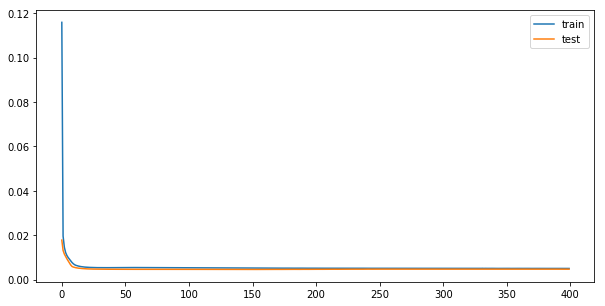

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


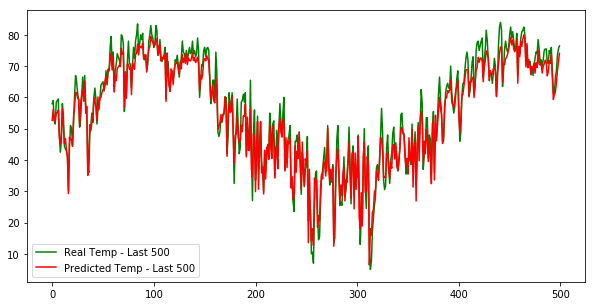

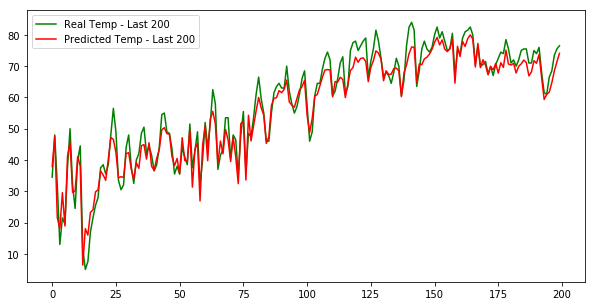

epoch_num: 400 neuron_num: 24
Test MSE: 45.334
Test RMSE: 6.733
Goodness of fit: 0.856
Mean Absolute Percentage Error: 14.167

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/400
 - 0s - loss: 0.0090 - val_loss: 0.0058
Epoch 2/400
 - 0s - loss: 0.0065 - val_loss: 0.0052
Epoch 3/400
 - 0s - loss: 0.0063 - val_loss: 0.0052
Epoch 4/400
 - 0s - loss: 0.0061 - val_loss: 0.0051
Epoch 5/400
 - 0s - loss: 0.0060 - val_loss: 0.0050
Epoch 6/400
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 7/400
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 8/400
 - 0s - loss: 0.0058 - val_loss: 0.0050
Epoch 9/400
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 10/400
 - 0s - loss: 0.0057 - val_loss: 0.0048
Epoch 11/400
 - 0s - loss: 0.0057 - val_loss: 0.0048
Epoch 12/400
 - 0s - loss: 0.0057 - val_loss: 0.0048
Epoch 13/400
 - 0s - loss: 0.0056 - val_loss: 0.0048
Epoch 14/400
 - 0s - loss: 0.0056 - val_loss: 0.0048
Epoch 15/40

Epoch 150/400
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 151/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 152/400
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 153/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 154/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 155/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 156/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 157/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 158/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 159/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 160/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 161/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 162/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 163/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 164/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 165/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 166/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 167/400
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 168/400
 - 0s - loss: 

Epoch 302/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 303/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 304/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 305/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 306/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 307/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 308/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 309/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 310/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 311/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 312/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 313/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 314/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 315/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 316/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 317/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 318/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 319/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 320/400
 - 0s - loss: 

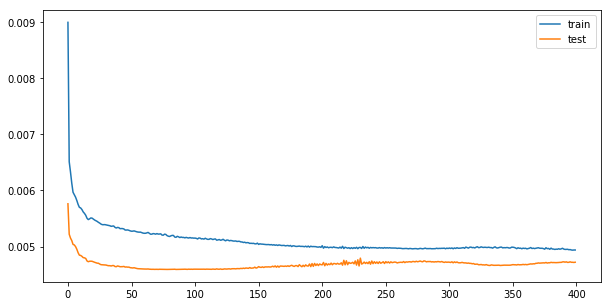

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


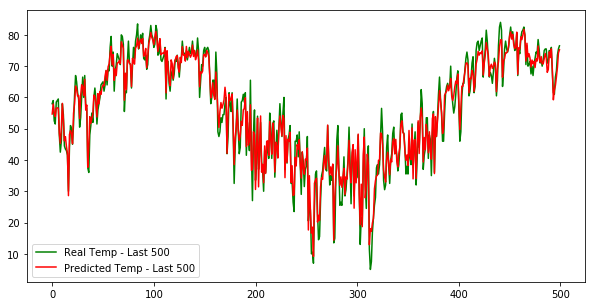

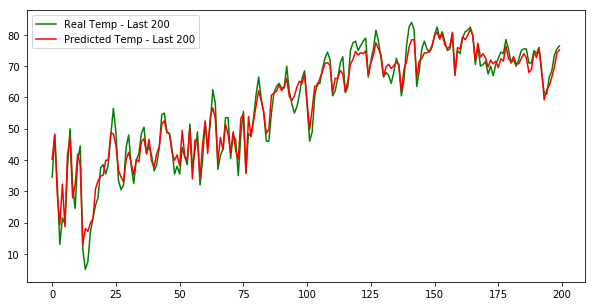

epoch_num: 400 neuron_num: 34
Test MSE: 45.370
Test RMSE: 6.736
Goodness of fit: 0.856
Mean Absolute Percentage Error: 14.664

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/400
 - 0s - loss: 0.0247 - val_loss: 0.0101
Epoch 2/400
 - 0s - loss: 0.0099 - val_loss: 0.0074
Epoch 3/400
 - 0s - loss: 0.0081 - val_loss: 0.0064
Epoch 4/400
 - 0s - loss: 0.0072 - val_loss: 0.0059
Epoch 5/400
 - 0s - loss: 0.0066 - val_loss: 0.0055
Epoch 6/400
 - 0s - loss: 0.0062 - val_loss: 0.0053
Epoch 7/400
 - 0s - loss: 0.0060 - val_loss: 0.0051
Epoch 8/400
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 9/400
 - 0s - loss: 0.0057 - val_loss: 0.0049
Epoch 10/400
 - 0s - loss: 0.0057 - val_loss: 0.0049
Epoch 11/400
 - 0s - loss: 0.0056 - val_loss: 0.0049
Epoch 12/400
 - 0s - loss: 0.0056 - val_loss: 0.0048
Epoch 13/400
 - 0s - loss: 0.0055 - val_loss: 0.0048
Epoch 14/400
 - 0s - loss: 0.0055 - val_loss: 0.0048
Epoch 15/40

Epoch 150/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 151/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 152/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 153/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 154/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 155/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 156/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 157/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 158/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 159/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 160/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 161/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 162/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 163/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 164/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 165/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 166/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 167/400
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 168/400
 - 0s - loss: 

Epoch 302/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 303/400
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 304/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 305/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 306/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 307/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 308/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 309/400
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 310/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 311/400
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 312/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 313/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 314/400
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 315/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 316/400
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 317/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 318/400
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 319/400
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 320/400
 - 0s - loss: 

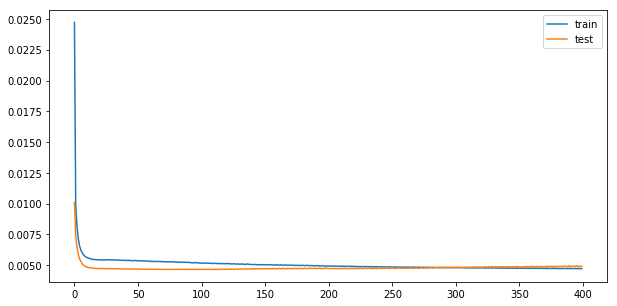

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


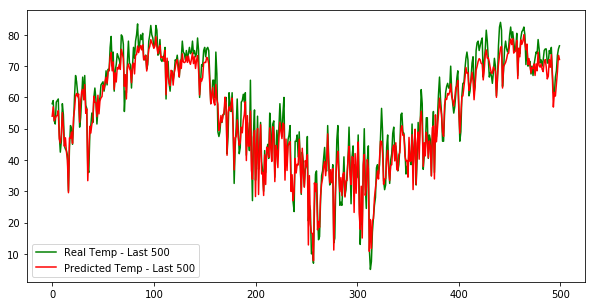

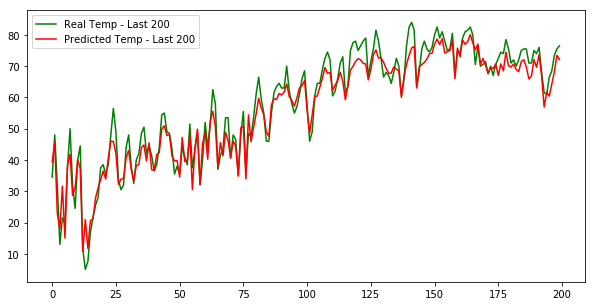

epoch_num: 400 neuron_num: 44
Test MSE: 47.254
Test RMSE: 6.874
Goodness of fit: 0.850
Mean Absolute Percentage Error: 14.530

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/600
 - 0s - loss: 0.1942 - val_loss: 0.0185
Epoch 2/600
 - 0s - loss: 0.0204 - val_loss: 0.0139
Epoch 3/600
 - 0s - loss: 0.0158 - val_loss: 0.0107
Epoch 4/600
 - 0s - loss: 0.0123 - val_loss: 0.0082
Epoch 5/600
 - 0s - loss: 0.0102 - val_loss: 0.0073
Epoch 6/600
 - 0s - loss: 0.0091 - val_loss: 0.0068
Epoch 7/600
 - 0s - loss: 0.0083 - val_loss: 0.0064
Epoch 8/600
 - 0s - loss: 0.0077 - val_loss: 0.0060
Epoch 9/600
 - 0s - loss: 0.0073 - val_loss: 0.0057
Epoch 10/600
 - 0s - loss: 0.0069 - val_loss: 0.0055
Epoch 11/600
 - 0s - loss: 0.0067 - val_loss: 0.0054
Epoch 12/600
 - 0s - loss: 0.0065 - val_loss: 0.0053
Epoch 13/600
 - 0s - loss: 0.0063 - val_loss: 0.0052
Epoch 14/600
 - 0s - loss: 0.0062 - val_loss: 0.0051
Epoch 15/60

Epoch 150/600
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 151/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 152/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 153/600
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 154/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 155/600
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 156/600
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 157/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 158/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 159/600
 - 0s - loss: 0.0053 - val_loss: 0.0047
Epoch 160/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 161/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 162/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 163/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 164/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 165/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 166/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 167/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 168/600
 - 0s - loss: 

Epoch 302/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 303/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 304/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 305/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 306/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 307/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 308/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 309/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 310/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 311/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 312/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 313/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 314/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 315/600
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 316/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 317/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 318/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 319/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 320/600
 - 0s - loss: 

Epoch 454/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 455/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 456/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 457/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 458/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 459/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 460/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 461/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 462/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 463/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 464/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 465/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 466/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 467/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 468/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 469/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 470/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 471/600
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 472/600
 - 0s - loss: 

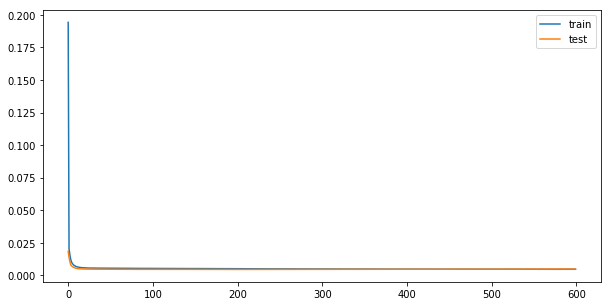

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


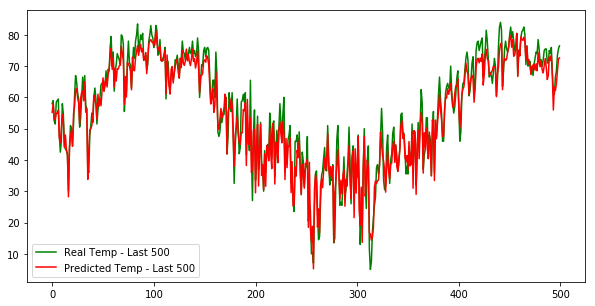

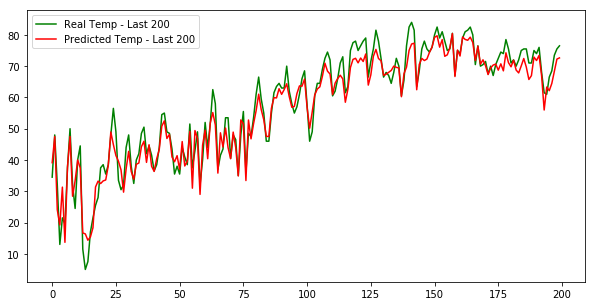

epoch_num: 600 neuron_num: 24
Test MSE: 47.623
Test RMSE: 6.901
Goodness of fit: 0.849
Mean Absolute Percentage Error: 14.629

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/600
 - 0s - loss: 0.0200 - val_loss: 0.0110
Epoch 2/600
 - 0s - loss: 0.0100 - val_loss: 0.0070
Epoch 3/600
 - 0s - loss: 0.0076 - val_loss: 0.0058
Epoch 4/600
 - 0s - loss: 0.0066 - val_loss: 0.0052
Epoch 5/600
 - 0s - loss: 0.0061 - val_loss: 0.0049
Epoch 6/600
 - 0s - loss: 0.0058 - val_loss: 0.0048
Epoch 7/600
 - 0s - loss: 0.0057 - val_loss: 0.0047
Epoch 8/600
 - 0s - loss: 0.0056 - val_loss: 0.0047
Epoch 9/600
 - 0s - loss: 0.0057 - val_loss: 0.0047
Epoch 10/600
 - 0s - loss: 0.0057 - val_loss: 0.0047
Epoch 11/600
 - 0s - loss: 0.0058 - val_loss: 0.0047
Epoch 12/600
 - 0s - loss: 0.0058 - val_loss: 0.0047
Epoch 13/600
 - 0s - loss: 0.0058 - val_loss: 0.0047
Epoch 14/600
 - 0s - loss: 0.0058 - val_loss: 0.0047
Epoch 15/60

Epoch 150/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 151/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 152/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 153/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 154/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 155/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 156/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 157/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 158/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 159/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 160/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 161/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 162/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 163/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 164/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 165/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 166/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 167/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 168/600
 - 0s - loss: 

Epoch 302/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 303/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 304/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 305/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 306/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 307/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 308/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 309/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 310/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 311/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 312/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 313/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 314/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 315/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 316/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 317/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 318/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 319/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 320/600
 - 0s - loss: 

Epoch 454/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 455/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 456/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 457/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 458/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 459/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 460/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 461/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 462/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 463/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 464/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 465/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 466/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 467/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 468/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 469/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 470/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 471/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 472/600
 - 0s - loss: 

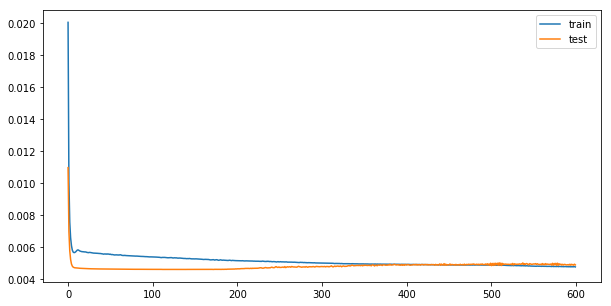

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


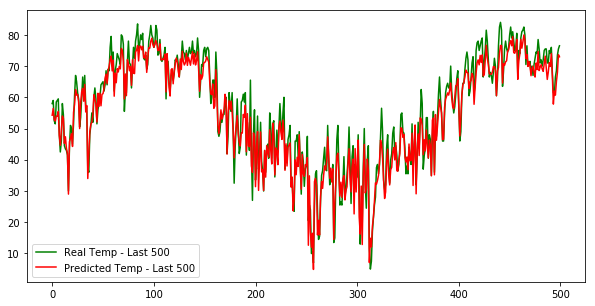

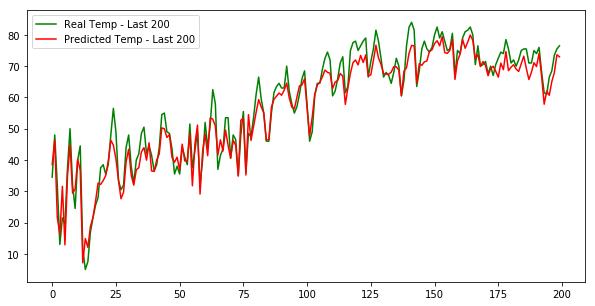

epoch_num: 600 neuron_num: 34
Test MSE: 46.862
Test RMSE: 6.846
Goodness of fit: 0.851
Mean Absolute Percentage Error: 13.959

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/600
 - 0s - loss: 0.1744 - val_loss: 0.0225
Epoch 2/600
 - 0s - loss: 0.0195 - val_loss: 0.0105
Epoch 3/600
 - 0s - loss: 0.0118 - val_loss: 0.0081
Epoch 4/600
 - 0s - loss: 0.0090 - val_loss: 0.0067
Epoch 5/600
 - 0s - loss: 0.0079 - val_loss: 0.0061
Epoch 6/600
 - 0s - loss: 0.0072 - val_loss: 0.0058
Epoch 7/600
 - 0s - loss: 0.0069 - val_loss: 0.0056
Epoch 8/600
 - 0s - loss: 0.0066 - val_loss: 0.0054
Epoch 9/600
 - 0s - loss: 0.0064 - val_loss: 0.0053
Epoch 10/600
 - 0s - loss: 0.0062 - val_loss: 0.0052
Epoch 11/600
 - 0s - loss: 0.0060 - val_loss: 0.0051
Epoch 12/600
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 13/600
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 14/600
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 15/60

Epoch 150/600
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 151/600
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 152/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 153/600
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 154/600
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 155/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 156/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 157/600
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 158/600
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 159/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 160/600
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 161/600
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 162/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 163/600
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 164/600
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 165/600
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 166/600
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 167/600
 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 168/600
 - 0s - loss: 

Epoch 302/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 303/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 304/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 305/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 306/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 307/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 308/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 309/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 310/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 311/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 312/600
 - 0s - loss: 0.0049 - val_loss: 0.0050
Epoch 313/600
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 314/600
 - 0s - loss: 0.0049 - val_loss: 0.0050
Epoch 315/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 316/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 317/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 318/600
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 319/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 320/600
 - 0s - loss: 

Epoch 454/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 455/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 456/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 457/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 458/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 459/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 460/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 461/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 462/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 463/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 464/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 465/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 466/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 467/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 468/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 469/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 470/600
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 471/600
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 472/600
 - 0s - loss: 

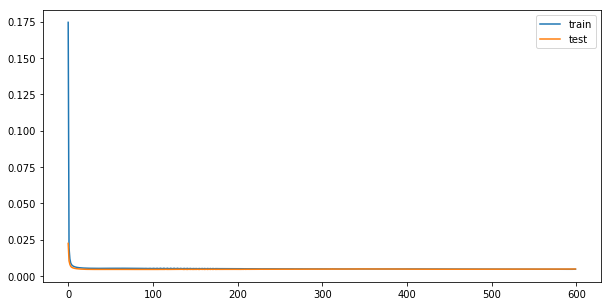

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


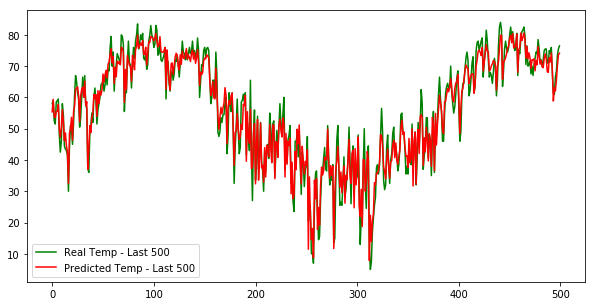

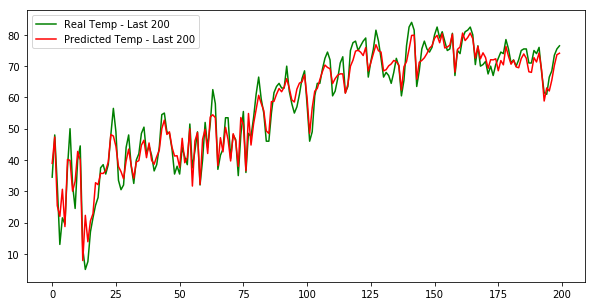

epoch_num: 600 neuron_num: 44
Test MSE: 47.115
Test RMSE: 6.864
Goodness of fit: 0.851
Mean Absolute Percentage Error: 14.735

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/800
 - 0s - loss: 0.0361 - val_loss: 0.0165
Epoch 2/800
 - 0s - loss: 0.0138 - val_loss: 0.0098
Epoch 3/800
 - 0s - loss: 0.0092 - val_loss: 0.0070
Epoch 4/800
 - 0s - loss: 0.0073 - val_loss: 0.0058
Epoch 5/800
 - 0s - loss: 0.0065 - val_loss: 0.0053
Epoch 6/800
 - 0s - loss: 0.0061 - val_loss: 0.0051
Epoch 7/800
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 8/800
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 9/800
 - 0s - loss: 0.0057 - val_loss: 0.0048
Epoch 10/800
 - 0s - loss: 0.0056 - val_loss: 0.0048
Epoch 11/800
 - 0s - loss: 0.0056 - val_loss: 0.0048
Epoch 12/800
 - 0s - loss: 0.0056 - val_loss: 0.0047
Epoch 13/800
 - 0s - loss: 0.0056 - val_loss: 0.0047
Epoch 14/800
 - 0s - loss: 0.0056 - val_loss: 0.0047
Epoch 15/80

Epoch 150/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 151/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 152/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 153/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 154/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 155/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 156/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 157/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 158/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 159/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 160/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 161/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 162/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 163/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 164/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 165/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 166/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 167/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 168/800
 - 0s - loss: 

Epoch 302/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 303/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 304/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 305/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 306/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 307/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 308/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 309/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 310/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 311/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 312/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 313/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 314/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 315/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 316/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 317/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 318/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 319/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 320/800
 - 0s - loss: 

Epoch 454/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 455/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 456/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 457/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 458/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 459/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 460/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 461/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 462/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 463/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 464/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 465/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 466/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 467/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 468/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 469/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 470/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 471/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 472/800
 - 0s - loss: 

Epoch 606/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 607/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 608/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 609/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 610/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 611/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 612/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 613/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 614/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 615/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 616/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 617/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 618/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 619/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 620/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 621/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 622/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 623/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 624/800
 - 0s - loss: 

Epoch 758/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 759/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 760/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 761/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 762/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 763/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 764/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 765/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 766/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 767/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 768/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 769/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 770/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 771/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 772/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 773/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 774/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 775/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 776/800
 - 0s - loss: 

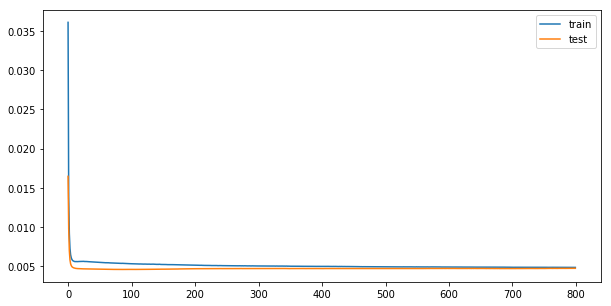

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


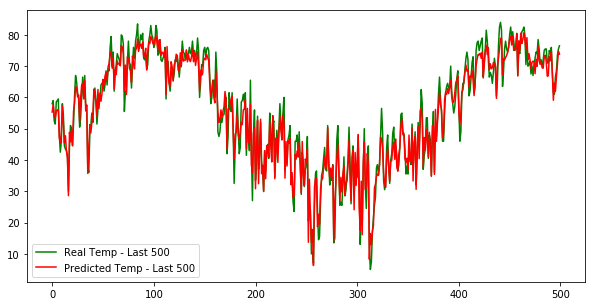

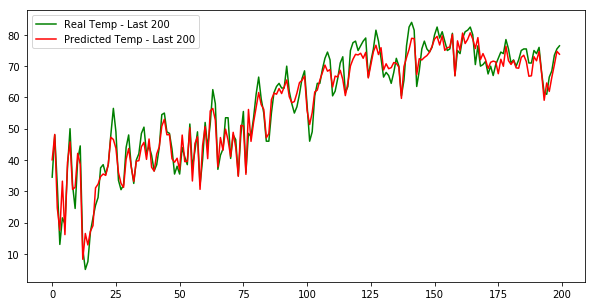

epoch_num: 800 neuron_num: 24
Test MSE: 45.530
Test RMSE: 6.748
Goodness of fit: 0.856
Mean Absolute Percentage Error: 14.310

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/800
 - 0s - loss: 0.1212 - val_loss: 0.0260
Epoch 2/800
 - 0s - loss: 0.0243 - val_loss: 0.0160
Epoch 3/800
 - 0s - loss: 0.0159 - val_loss: 0.0120
Epoch 4/800
 - 0s - loss: 0.0125 - val_loss: 0.0106
Epoch 5/800
 - 0s - loss: 0.0112 - val_loss: 0.0096
Epoch 6/800
 - 0s - loss: 0.0104 - val_loss: 0.0088
Epoch 7/800
 - 0s - loss: 0.0098 - val_loss: 0.0082
Epoch 8/800
 - 0s - loss: 0.0093 - val_loss: 0.0077
Epoch 9/800
 - 0s - loss: 0.0089 - val_loss: 0.0073
Epoch 10/800
 - 0s - loss: 0.0086 - val_loss: 0.0070
Epoch 11/800
 - 0s - loss: 0.0083 - val_loss: 0.0068
Epoch 12/800
 - 0s - loss: 0.0080 - val_loss: 0.0066
Epoch 13/800
 - 0s - loss: 0.0077 - val_loss: 0.0064
Epoch 14/800
 - 0s - loss: 0.0075 - val_loss: 0.0062
Epoch 15/80

Epoch 150/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 151/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 152/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 153/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 154/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 155/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 156/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 157/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 158/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 159/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 160/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 161/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 162/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 163/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 164/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 165/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 166/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 167/800
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 168/800
 - 0s - loss: 

Epoch 302/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 303/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 304/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 305/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 306/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 307/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 308/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 309/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 310/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 311/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 312/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 313/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 314/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 315/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 316/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 317/800
 - 0s - loss: 0.0050 - val_loss: 0.0047
Epoch 318/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 319/800
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 320/800
 - 0s - loss: 

Epoch 454/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 455/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 456/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 457/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 458/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 459/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 460/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 461/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 462/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 463/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 464/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 465/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 466/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 467/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 468/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 469/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 470/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 471/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 472/800
 - 0s - loss: 

Epoch 606/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 607/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 608/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 609/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 610/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 611/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 612/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 613/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 614/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 615/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 616/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 617/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 618/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 619/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 620/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 621/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 622/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 623/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 624/800
 - 0s - loss: 

Epoch 758/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 759/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 760/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 761/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 762/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 763/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 764/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 765/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 766/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 767/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 768/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 769/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 770/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 771/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 772/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 773/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 774/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 775/800
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 776/800
 - 0s - loss: 

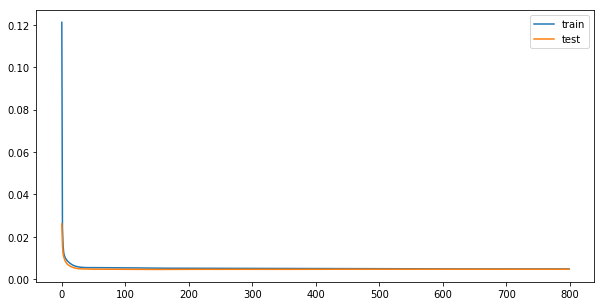

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


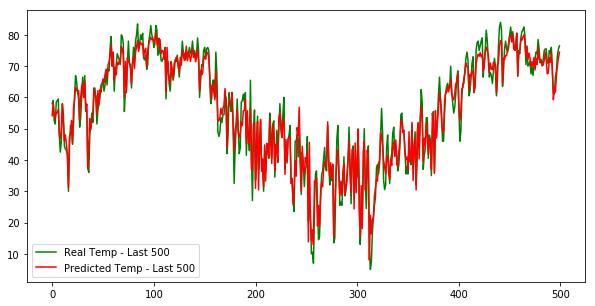

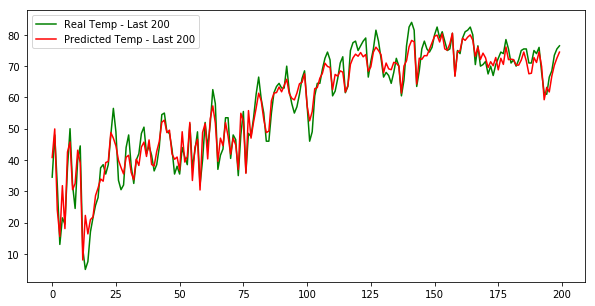

epoch_num: 800 neuron_num: 34
Test MSE: 45.535
Test RMSE: 6.748
Goodness of fit: 0.856
Mean Absolute Percentage Error: 14.618

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/800
 - 0s - loss: 0.0821 - val_loss: 0.0272
Epoch 2/800
 - 0s - loss: 0.0245 - val_loss: 0.0121
Epoch 3/800
 - 0s - loss: 0.0117 - val_loss: 0.0079
Epoch 4/800
 - 0s - loss: 0.0093 - val_loss: 0.0070
Epoch 5/800
 - 0s - loss: 0.0081 - val_loss: 0.0063
Epoch 6/800
 - 0s - loss: 0.0073 - val_loss: 0.0058
Epoch 7/800
 - 0s - loss: 0.0068 - val_loss: 0.0054
Epoch 8/800
 - 0s - loss: 0.0064 - val_loss: 0.0052
Epoch 9/800
 - 0s - loss: 0.0061 - val_loss: 0.0051
Epoch 10/800
 - 0s - loss: 0.0059 - val_loss: 0.0050
Epoch 11/800
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 12/800
 - 0s - loss: 0.0057 - val_loss: 0.0048
Epoch 13/800
 - 0s - loss: 0.0057 - val_loss: 0.0047
Epoch 14/800
 - 0s - loss: 0.0056 - val_loss: 0.0047
Epoch 15/80

Epoch 150/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 151/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 152/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 153/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 154/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 155/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 156/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 157/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 158/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 159/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 160/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 161/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 162/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 163/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 164/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 165/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 166/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 167/800
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 168/800
 - 0s - loss: 

Epoch 302/800
 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 303/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 304/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 305/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 306/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 307/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 308/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 309/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 310/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 311/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 312/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 313/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 314/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 315/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 316/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 317/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 318/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 319/800
 - 0s - loss: 0.0049 - val_loss: 0.0048
Epoch 320/800
 - 0s - loss: 

Epoch 454/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 455/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 456/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 457/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 458/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 459/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 460/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 461/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 462/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 463/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 464/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 465/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 466/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 467/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 468/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 469/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 470/800
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 471/800
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 472/800
 - 0s - loss: 

Epoch 606/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 607/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 608/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 609/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 610/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 611/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 612/800
 - 0s - loss: 0.0046 - val_loss: 0.0052
Epoch 613/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 614/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 615/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 616/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 617/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 618/800
 - 0s - loss: 0.0046 - val_loss: 0.0052
Epoch 619/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 620/800
 - 0s - loss: 0.0046 - val_loss: 0.0052
Epoch 621/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 622/800
 - 0s - loss: 0.0046 - val_loss: 0.0051
Epoch 623/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 624/800
 - 0s - loss: 

Epoch 758/800
 - 0s - loss: 0.0045 - val_loss: 0.0052
Epoch 759/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 760/800
 - 0s - loss: 0.0045 - val_loss: 0.0051
Epoch 761/800
 - 0s - loss: 0.0045 - val_loss: 0.0053
Epoch 762/800
 - 0s - loss: 0.0046 - val_loss: 0.0052
Epoch 763/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 764/800
 - 0s - loss: 0.0046 - val_loss: 0.0054
Epoch 765/800
 - 0s - loss: 0.0046 - val_loss: 0.0051
Epoch 766/800
 - 0s - loss: 0.0045 - val_loss: 0.0051
Epoch 767/800
 - 0s - loss: 0.0046 - val_loss: 0.0054
Epoch 768/800
 - 0s - loss: 0.0046 - val_loss: 0.0051
Epoch 769/800
 - 0s - loss: 0.0045 - val_loss: 0.0052
Epoch 770/800
 - 0s - loss: 0.0046 - val_loss: 0.0054
Epoch 771/800
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 772/800
 - 0s - loss: 0.0046 - val_loss: 0.0055
Epoch 773/800
 - 0s - loss: 0.0046 - val_loss: 0.0051
Epoch 774/800
 - 0s - loss: 0.0045 - val_loss: 0.0051
Epoch 775/800
 - 0s - loss: 0.0046 - val_loss: 0.0053
Epoch 776/800
 - 0s - loss: 

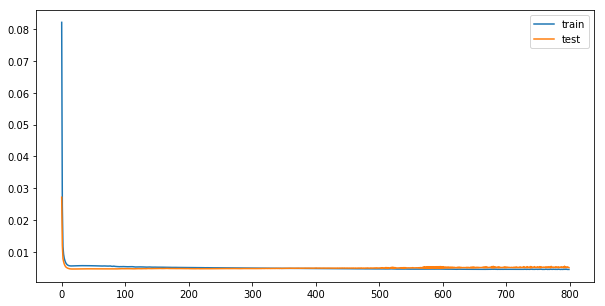

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


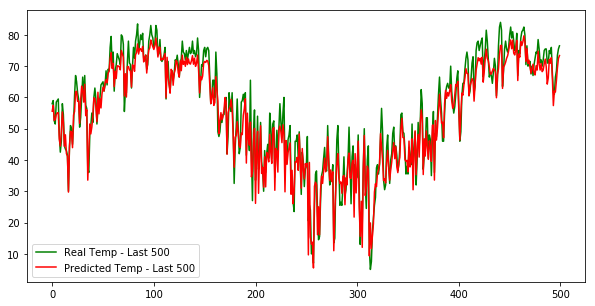

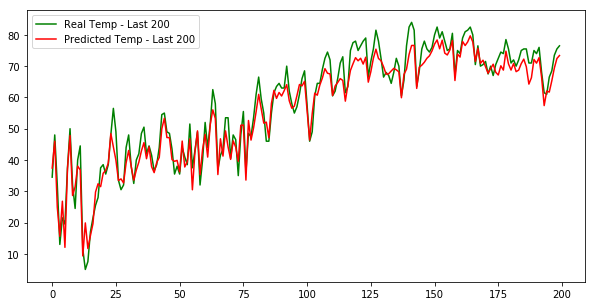

epoch_num: 800 neuron_num: 44
Test MSE: 49.097
Test RMSE: 7.007
Goodness of fit: 0.844
Mean Absolute Percentage Error: 14.683

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/1000
 - 0s - loss: 0.0772 - val_loss: 0.0229
Epoch 2/1000
 - 0s - loss: 0.0197 - val_loss: 0.0111
Epoch 3/1000
 - 0s - loss: 0.0105 - val_loss: 0.0081
Epoch 4/1000
 - 0s - loss: 0.0082 - val_loss: 0.0070
Epoch 5/1000
 - 0s - loss: 0.0074 - val_loss: 0.0063
Epoch 6/1000
 - 0s - loss: 0.0068 - val_loss: 0.0058
Epoch 7/1000
 - 0s - loss: 0.0065 - val_loss: 0.0055
Epoch 8/1000
 - 0s - loss: 0.0062 - val_loss: 0.0052
Epoch 9/1000
 - 0s - loss: 0.0060 - val_loss: 0.0051
Epoch 10/1000
 - 0s - loss: 0.0058 - val_loss: 0.0050
Epoch 11/1000
 - 0s - loss: 0.0057 - val_loss: 0.0050
Epoch 12/1000
 - 0s - loss: 0.0056 - val_loss: 0.0049
Epoch 13/1000
 - 0s - loss: 0.0056 - val_loss: 0.0049
Epoch 14/1000
 - 0s - loss: 0.0055 - val_loss: 0.00

 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 148/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 149/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 150/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 151/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 152/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 153/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 154/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 155/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 156/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 157/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 158/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 159/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 160/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 161/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 162/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 163/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 164/1000
 - 0s - loss: 0.0053 - val_loss: 0.0046
Epoch 165/1000
 - 0s - lo

 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 297/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 298/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 299/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 300/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 301/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 302/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 303/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 304/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 305/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 306/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 307/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 308/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 309/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 310/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 311/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 312/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 313/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 314/1000
 - 0s - lo

 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 446/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 447/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 448/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 449/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 450/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 451/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 452/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 453/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 454/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 455/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 456/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 457/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 458/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 459/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 460/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 461/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 462/1000
 - 0s - loss: 0.0050 - val_loss: 0.0046
Epoch 463/1000
 - 0s - lo

 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 595/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 596/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 597/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 598/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 599/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 600/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 601/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 602/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 603/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 604/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 605/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 606/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 607/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 608/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 609/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 610/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 611/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 612/1000
 - 0s - lo

 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 744/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 745/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 746/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 747/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 748/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 749/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 750/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 751/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 752/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 753/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 754/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 755/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 756/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 757/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 758/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 759/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 760/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 761/1000
 - 0s - lo

 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 893/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 894/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 895/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 896/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 897/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 898/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 899/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 900/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 901/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 902/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 903/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 904/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 905/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 906/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 907/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 908/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 909/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 910/1000
 - 0s - lo

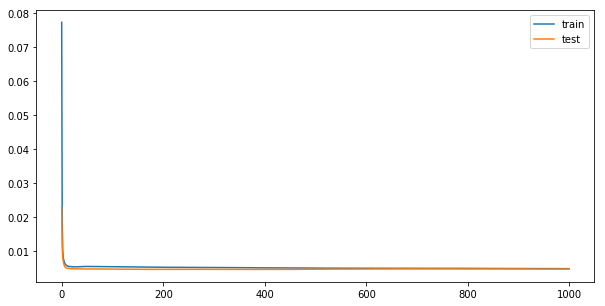

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


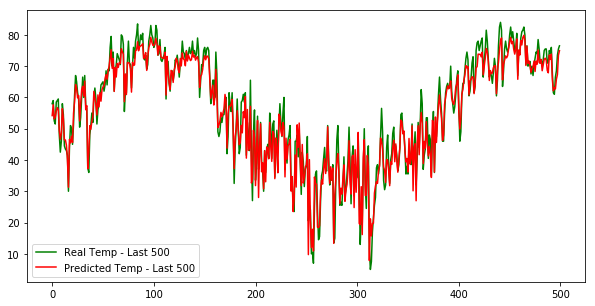

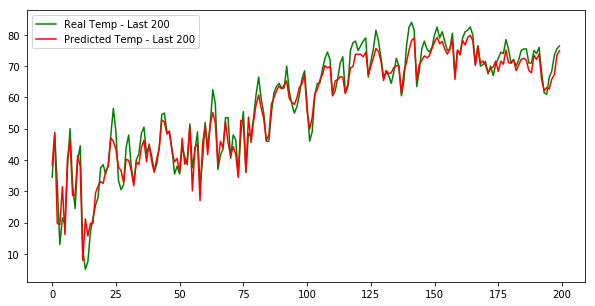

epoch_num: 1000 neuron_num: 24
Test MSE: 45.213
Test RMSE: 6.724
Goodness of fit: 0.857
Mean Absolute Percentage Error: 14.045

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/1000
 - 0s - loss: 0.0250 - val_loss: 0.0119
Epoch 2/1000
 - 0s - loss: 0.0095 - val_loss: 0.0060
Epoch 3/1000
 - 0s - loss: 0.0064 - val_loss: 0.0052
Epoch 4/1000
 - 0s - loss: 0.0060 - val_loss: 0.0050
Epoch 5/1000
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 6/1000
 - 0s - loss: 0.0057 - val_loss: 0.0049
Epoch 7/1000
 - 0s - loss: 0.0057 - val_loss: 0.0049
Epoch 8/1000
 - 0s - loss: 0.0057 - val_loss: 0.0049
Epoch 9/1000
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 10/1000
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 11/1000
 - 0s - loss: 0.0059 - val_loss: 0.0048
Epoch 12/1000
 - 0s - loss: 0.0058 - val_loss: 0.0048
Epoch 13/1000
 - 0s - loss: 0.0058 - val_loss: 0.0048
Epoch 14/1000
 - 0s - loss: 0.0057 - val_loss: 0.0

 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 148/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 149/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 150/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 151/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 152/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 153/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 154/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 155/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 156/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 157/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 158/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 159/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 160/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 161/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 162/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 163/1000
 - 0s - loss: 0.0052 - val_loss: 0.0046
Epoch 164/1000
 - 0s - loss: 0.0051 - val_loss: 0.0046
Epoch 165/1000
 - 0s - lo

Epoch 297/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 298/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 299/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 300/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 301/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 302/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 303/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 304/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 305/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 306/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 307/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 308/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 309/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 310/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 311/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 312/1000
 - 0s - loss: 0.0049 - val_loss: 0.0047
Epoch 313/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 314/1000
 - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 315/

Epoch 446/1000
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 447/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 448/1000
 - 0s - loss: 0.0048 - val_loss: 0.0047
Epoch 449/1000
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 450/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 451/1000
 - 0s - loss: 0.0048 - val_loss: 0.0047
Epoch 452/1000
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 453/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 454/1000
 - 0s - loss: 0.0048 - val_loss: 0.0047
Epoch 455/1000
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 456/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 457/1000
 - 0s - loss: 0.0048 - val_loss: 0.0047
Epoch 458/1000
 - 0s - loss: 0.0048 - val_loss: 0.0048
Epoch 459/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 460/1000
 - 0s - loss: 0.0048 - val_loss: 0.0047
Epoch 461/1000
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 462/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 463/1000
 - 0s - loss: 0.0048 - val_loss: 0.0047
Epoch 464/

Epoch 595/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 596/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 597/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 598/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 599/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 600/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 601/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 602/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 603/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 604/1000
 - 0s - loss: 0.0047 - val_loss: 0.0048
Epoch 605/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 606/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 607/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 608/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 609/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 610/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 611/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 612/1000
 - 0s - loss: 0.0047 - val_loss: 0.0049
Epoch 613/

Epoch 744/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 745/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 746/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 747/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 748/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 749/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 750/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 751/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 752/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 753/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 754/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 755/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 756/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 757/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 758/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 759/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 760/1000
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 761/1000
 - 0s - loss: 0.0047 - val_loss: 0.0051
Epoch 762/

Epoch 893/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 894/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 895/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 896/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 897/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 898/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 899/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 900/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 901/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 902/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 903/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 904/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 905/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 906/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 907/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 908/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 909/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 910/1000
 - 0s - loss: 0.0047 - val_loss: 0.0047
Epoch 911/

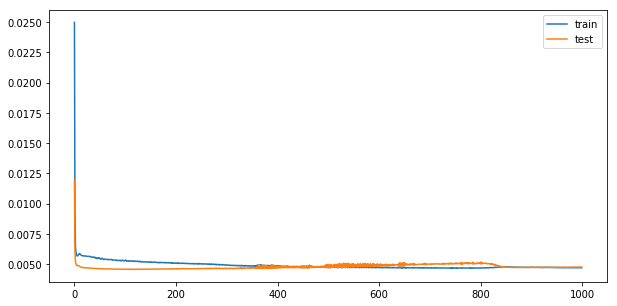

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


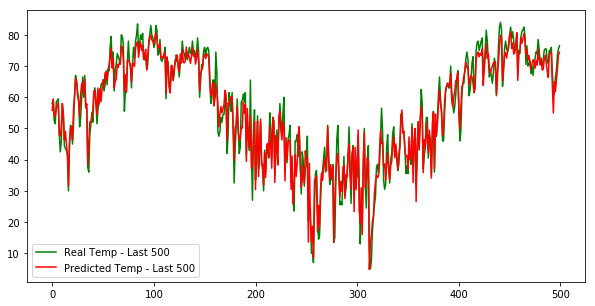

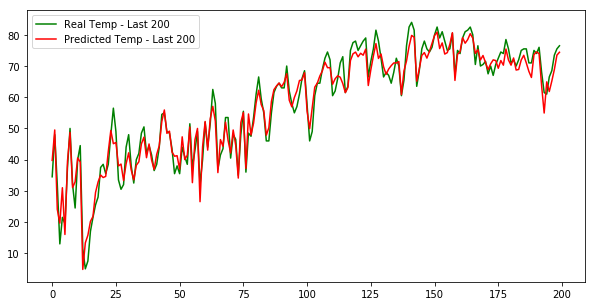

epoch_num: 1000 neuron_num: 34
Test MSE: 45.702
Test RMSE: 6.760
Goodness of fit: 0.855
Mean Absolute Percentage Error: 14.353

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/1000
 - 0s - loss: 0.1003 - val_loss: 0.0163
Epoch 2/1000
 - 0s - loss: 0.0138 - val_loss: 0.0082
Epoch 3/1000
 - 0s - loss: 0.0083 - val_loss: 0.0064
Epoch 4/1000
 - 0s - loss: 0.0071 - val_loss: 0.0056
Epoch 5/1000
 - 0s - loss: 0.0064 - val_loss: 0.0052
Epoch 6/1000
 - 0s - loss: 0.0060 - val_loss: 0.0050
Epoch 7/1000
 - 0s - loss: 0.0058 - val_loss: 0.0049
Epoch 8/1000
 - 0s - loss: 0.0057 - val_loss: 0.0048
Epoch 9/1000
 - 0s - loss: 0.0056 - val_loss: 0.0048
Epoch 10/1000
 - 0s - loss: 0.0055 - val_loss: 0.0047
Epoch 11/1000
 - 0s - loss: 0.0054 - val_loss: 0.0047
Epoch 12/1000
 - 0s - loss: 0.0054 - val_loss: 0.0047
Epoch 13/1000
 - 0s - loss: 0.0054 - val_loss: 0.0047
Epoch 14/1000
 - 0s - loss: 0.0054 - val_loss: 0.0

 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 148/1000
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 149/1000
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 150/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 151/1000
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 152/1000
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 153/1000
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 154/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 155/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 156/1000
 - 0s - loss: 0.0052 - val_loss: 0.0047
Epoch 157/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 158/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 159/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 160/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 161/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 162/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 163/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 164/1000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 165/1000
 - 0s - lo

Epoch 297/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 298/1000
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 299/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 300/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 301/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 302/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 303/1000
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 304/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 305/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 306/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 307/1000
 - 0s - loss: 0.0049 - val_loss: 0.0049
Epoch 308/1000
 - 0s - loss: 0.0049 - val_loss: 0.0050
Epoch 309/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 310/1000
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 311/1000
 - 0s - loss: 0.0049 - val_loss: 0.0050
Epoch 312/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 313/1000
 - 0s - loss: 0.0048 - val_loss: 0.0049
Epoch 314/1000
 - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 315/

Epoch 446/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 447/1000
 - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 448/1000
 - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 449/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 450/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 451/1000
 - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 452/1000
 - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 453/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 454/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 455/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 456/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 457/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 458/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 459/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 460/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 461/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 462/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 463/1000
 - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 464/

Epoch 595/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 596/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 597/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 598/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 599/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 600/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 601/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 602/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 603/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 604/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 605/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 606/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 607/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 608/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 609/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 610/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 611/1000
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 612/1000
 - 0s - loss: 0.0046 - val_loss: 0.0050
Epoch 613/

Epoch 744/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 745/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 746/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 747/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 748/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 749/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 750/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 751/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 752/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 753/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 754/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 755/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 756/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 757/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 758/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 759/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 760/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 761/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 762/

Epoch 893/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 894/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 895/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 896/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 897/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 898/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 899/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 900/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 901/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 902/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 903/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 904/1000
 - 0s - loss: 0.0045 - val_loss: 0.0050
Epoch 905/1000
 - 0s - loss: 0.0045 - val_loss: 0.0051
Epoch 906/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 907/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 908/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 909/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 910/1000
 - 0s - loss: 0.0044 - val_loss: 0.0050
Epoch 911/

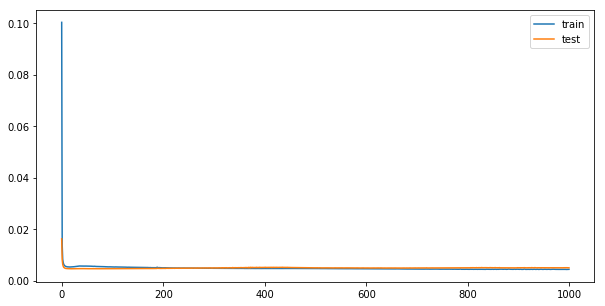

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


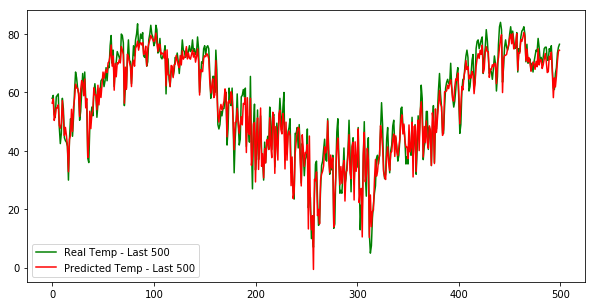

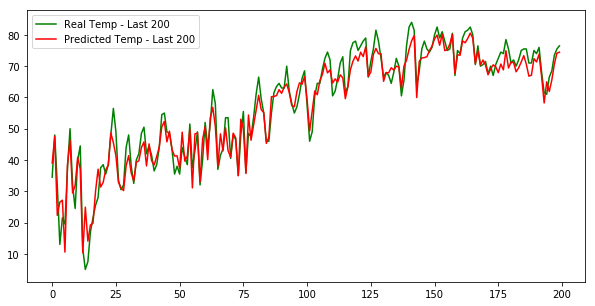

epoch_num: 1000 neuron_num: 44
Test MSE: 48.376
Test RMSE: 6.955
Goodness of fit: 0.847
Mean Absolute Percentage Error: 14.415

________________________________________________________________________________


In [16]:
model_epoch = []
model_neuron = []
model_rmse = []
model_r2 = []
model_mse = []
model_mape = []


# Batch - number of training examples in a forward/backwards pass
batch_num = 27
# Number of model runs: 
model_runs = 1
# Number of neurons
neurons = [24, 34, 44]
# Epochs - number of forward and backward passes of all training examples
epochs = [400, 600, 800, 1000]
for run in range(model_runs):
    for epoch_num in epochs:
        for neuron_num in neurons:   
            # Fit the model: 
            modelMLP3 = fit_model(train_X, train_y, test_X, test_y, batch_num, epoch_num, neuron_num)
            # Make the prediction on test data
            yhat = modelMLP3.predict(test_X, batch_size=batch_num)
            print('Model predictions shape: ', yhat.shape)
        
        
            # print('Scale back to get non scaled scores:') 
            # print('Concat predicted test y and x, then scale back:')
            yhat_concat = concatenate((yhat, test_X[:, -2:]), axis=1)
            yhat_concat_inverse  = scaler.inverse_transform(yhat_concat)
            predictions  = yhat_concat_inverse[:,0]
        
        
            # print('Concat real test y and x, then scale back:')
            test_y = test_y.reshape((len(test_y), 1))
            y_concat = concatenate((test_y, test_X[:, -2:]), axis=1)
            y_concat_inverse = scaler.inverse_transform(y_concat)
            scaledBack_test_y = y_concat_inverse[:,0]
        
        
            # Real vs Predicted values: 
            # Because X (and thus predictions) is one day behind Y. The time series plot look a bit off. 
            # Let's place back the data so we can see the plots better
            # The prediction “prediction” is one index ahead of real output “scaledBack_test_y”.
            plot_y = scaledBack_test_y[:-1]
            plot_predictions = predictions[1:]

        
            pyplot.plot(plot_y[-500:], color='green', label = 'Real Temp - Last 500')
            pyplot.plot(plot_predictions[-500:], color='red', label = 'Predicted Temp - Last 500')
            pyplot.legend()
            pyplot.show()
        
            pyplot.plot(plot_y[-200:], color='green', label = 'Real Temp - Last 200')
            pyplot.plot(plot_predictions[-200:], color='red', label = 'Predicted Temp - Last 200')
            pyplot.legend()
            pyplot.show()
            
            # Score the test: 
            print("epoch_num:", epoch_num, "neuron_num:", neuron_num )
            mse = mean_squared_error(scaledBack_test_y, predictions)
            print('Test MSE: %.3f' % mse)
            rmse = sqrt(mean_squared_error(scaledBack_test_y, predictions))
            print('Test RMSE: %.3f' % rmse)
            r2score = r2_score(scaledBack_test_y, predictions)
            print('Goodness of fit: %.3f' % r2score)
            model_mse.append(mse)
            model_rmse.append(rmse)
            model_r2.append(r2score)
            model_epoch.append(epoch_num)
            model_neuron.append(neuron_num,)
            # Mean Absolute Percentage Error
            # http://mariofilho.com/create-simple-machine-learning-model-predict-time-series/
            # MAPE, as it is scale-independent 
            # and represents the ratio of error to actual values as a percent
            def mape(y_pred,y_true):
                return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            mapescore = mape(predictions,scaledBack_test_y)
            model_mape.append(mapescore)
            print('Mean Absolute Percentage Error: %.3f' % mapescore)
            print()
            print('________________________________________________________________________________')
            #
            #model_autocorr = []
            #model_normal = []
            #model_variance = []
            
        

In [17]:
predictionSummary = pd.DataFrame({
                                  'Epochs':np.array(model_epoch),
                                  'Neurons':np.array(model_neuron),
                                  'R2':np.array(model_r2),
                                  'RMSE':np.array(model_rmse),
                                  'MSE':np.array(model_mse),
                                  'MAPE':np.array(model_mape),})
                                  

print('MLP Lag3 Results - Sorted by R2 (Coefficient Of Determination - Goodness of fit) :')
print()
print(predictionSummary.sort_values(by=['R2'], ascending=False)) 
print()
print(predictionSummary.describe())



MLP Lag3 Results - Sorted by R2 (Coefficient Of Determination - Goodness of fit) :

    Epochs  Neurons        R2      RMSE        MSE       MAPE
9     1000       24  0.856642  6.724087  45.213345  14.045201
0      400       24  0.856260  6.733025  45.333622  14.166605
1      400       34  0.856146  6.735703  45.369701  14.663590
6      800       24  0.855638  6.747591  45.529987  14.310162
7      800       34  0.855622  6.747969  45.535091  14.618146
10    1000       34  0.855093  6.760314  45.701839  14.352690
4      600       34  0.851414  6.845598  46.862209  13.959238
5      600       44  0.850612  6.864036  47.114990  14.734970
2      400       44  0.850172  6.874153  47.253975  14.530070
3      600       24  0.849002  6.900929  47.622826  14.628693
11    1000       44  0.846615  6.955269  48.375763  14.415324
8      800       44  0.844327  7.006935  49.097145  14.682929

            Epochs    Neurons         R2       RMSE        MSE       MAPE
count    12.000000  12.000000  12.0

In [18]:
predictionSummary.to_csv('./data/MLPSummary.csv')
# Get the time: 
print(datetime.now() - startTime)

0:14:56.880722
